## 1.1 Model Formulation

In a match between two player 1 and 2. Each team $i$ has a random variable $s_i \sim \mathcal{N}(\mu_i, \sigma_i^2)$ representing the skill of a team, there are 20 teams. The outcome of a match between two players also have a Gaussian ramdom variable $t \sim \mathcal{N}(s_1 - s_2, \sigma_t^2)$. The binary varable y for the result of the match is $y=1$ if $t>0$ (player 1 wins). Consequently, $y=-1$ if $t \le 0$ (player 2 wins). 
$p(y|t) = \begin{cases}
    1 & \text{if } y = 1 \text{ and } t > 0\\
    1 & \text{if } y = -1 \text{ and } t \le 0\\
    0 & \text{otherwise.}
\end{cases} = 
\begin{cases}
    1 & \text{if } y > 0 \text{ and } t > 0\\
    1 & \text{if } y \le 0 \text{ and } t \le 0\\
    0 & \text{otherwise.}
\end{cases}
\hspace{3mm} = \mathbb{I}\{y \cdot t > 0\}$ , meaning 100% if the signs are the same and 0% if not. 


The joint probability is:
$p(s_1, s_2, t, y) = p(s_1) \cdot p(s_2) \cdot p(t \mid s_1, s_2) \cdot p(y \mid t) = $

$= \mathcal{N}(s_1, \sigma_1^2) \cdot \mathcal{N}(s_2, \sigma_2^2) \cdot \mathcal{N}(s_1 - s_2, \sigma_t^2) \cdot \mathbb{I}\{y \cdot t > 0\}$

y is just the outcome, not a hyperparameter. The five hyper paramters are $\mu_1$, $\mu_2$, $\sigma_1^2$, $\sigma_2^2$ and $\sigma_t^2$.


## 1.2 Bayesian Network and Factor Graph

<img src="image-20260104-183057.png" width="" align="" />

<img src="image-20260104-190016.png" width="" align="" />

The first graph is the Bayesian network for $p(s_1, s_2, t, y) = p(s_1) \cdot p(s_2) \cdot p(t\mid s_1, s_2) \cdot p(y\mid t)$

The second graph is the factor graph where:
$f_A = p(s_1)$
$f_B = p(s_2)$
$f_C = p(t \mid s_1, s_2)$
$f_D = p(y \mid t)$


## 1.3  Conditional Probabilities and Posterior



* $$p(s_1, s_2 \mid t, y) = p(s_1, s_2 \mid t) \propto p(t \mid s_1, s_2) P(s_1) P(s_2)$$ , these terms are known.

* $$p(t \mid y, s_1, s_2) = \frac{p(y \mid t, s_1, s_2) p(t \mid s_1, s_2)}{p(y \mid s_1, s_2)} \propto p(y \mid t, s_1, s_2) p(t \mid s_1, s_2) = p(y \mid t) p(t \mid s_1, s_2)$$ , these terms are also known. Here $p(y \mid t)$ will truncate the distribution of $p(t \mid s_1, s_2)$ to not give any probability of t not matching y.

* The probability of player 1 winning ($p(y=1)$) can be calcualted by the cumulative probability of t being above zero. Since $s_1 - s_2 \sim \mathcal{N}(\mu_1 - \mu_2, \sigma_1^2 + \sigma_2^2)$. Thus,  $t \sim \mathcal{N}(s_1 - s_2, \sigma_t^2)$ = $\mathcal{N}(\mu_1 - \mu_2, \sigma_1^2 + \sigma_2^2 + \sigma_t^2)$ since the variance of $\sigma_t^2$ is just added.

Regarding the truncation mentioned in the second point, to make the new distribution a probability distribution it has to be scaled. This is done by dividing the distribution by the cumulative distribution of t matching the y. Otherwise the distribution would just be a cut of gaussian distribution where the integral of the entire distribution would not be equal to one.
$$p(t \mid y, s_1, s_2) = \begin{cases} \frac{\mathcal{N}(t; s_1 - s_2, \sigma_t^2)}{p(t > 0 \mid s_1, s_2)} & \text{if } y=1 \text{ and } t > 0 \\ \frac{\mathcal{N}(t; s_1 - s_2, \sigma_t^2)}{p(t \le 0 \mid s_1, s_2)} & \text{if } y=-1 \text{ and } t \le 0 \\ 0 & \text{otherwise.} \end{cases}$$


Monte Carlo win rate of player 1:  0.360371
Win rate from derived formula:  0.35995892659722317


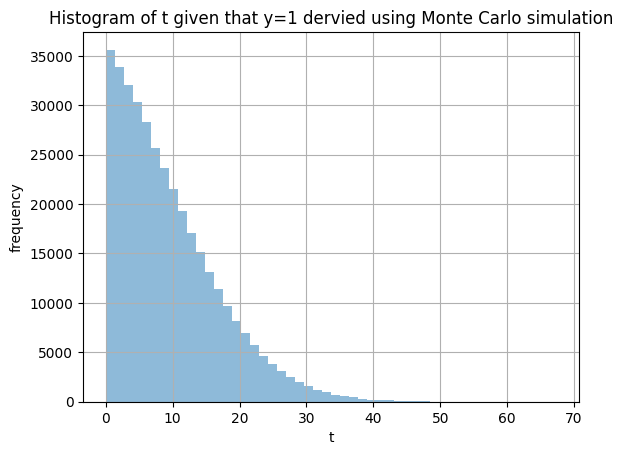

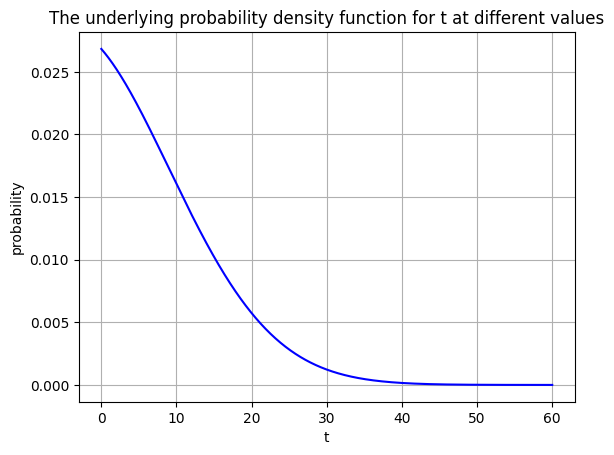

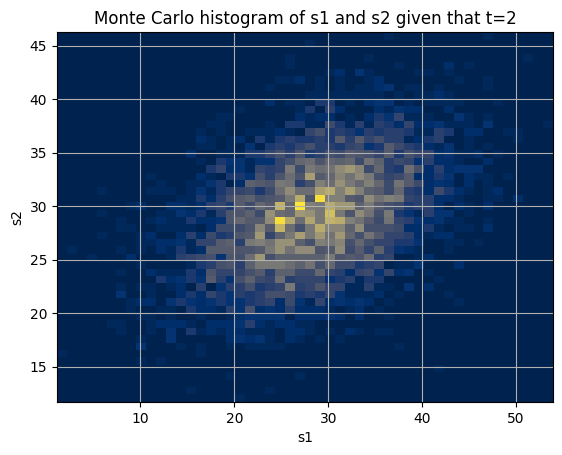

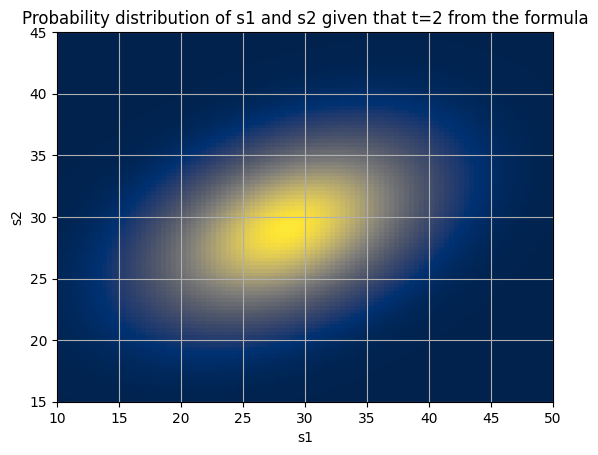

In [28]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

mu1 = 25
std1 = 10
mu2 = 30
std2 = 5
stdt = 25/3

iterations = 10**6

s1 = np.random.normal(loc=mu1, scale=std1, size=iterations)
s2 = np.random.normal(loc=mu2, scale=std2, size=iterations)
noise = np.random.normal(loc=0, scale=stdt, size=iterations)
t = s1 - s2 + noise
t_pos = t[t > 0]


# verify the probability of y=1
wins = len(t_pos)
print("Monte Carlo win rate of player 1: ", wins/iterations)
p_loss = norm.cdf(0, loc=mu1-mu2, scale=(std1**2 + std2**2 + stdt**2)**0.5)
p_win = 1 - p_loss
print("Win rate from derived formula: ", p_win)

# verify the probability of t given y, s_1, s_2

plt.hist(t_pos, bins=50, alpha=0.5)
plt.grid()
plt.title("Histogram of t given that y=1 dervied using Monte Carlo simulation")
plt.ylabel("frequency")
plt.xlabel("t")
plt.show() 

x = np.linspace(0, 60, 1000)
new_std = (std1**2 + std2**2 + stdt**2)**0.5
plt.plot(x, norm.pdf(x, loc=mu1-mu2, scale=new_std), 'b')
plt.grid()
plt.title("The underlying probability density function for t at different values")
plt.xlabel("t")
plt.ylabel("probability")
plt.show()

# verify the probability of s_1 and s_2 given t 
# assume y=1 and t=2, then using Monte Carlo, get the probability of s_1 and s_2
t_given = 2.0 # implies that y=1

def monte_carlo_s(samples=10**6, precision=0.1):
    s1 = np.random.normal(loc=mu1, scale=std1, size=samples)
    s2 = np.random.normal(loc=mu2, scale=std2, size=samples)
    t_dev = np.random.normal(loc=0, scale=stdt, size=samples)
    t_samples = s1 - s2 + t_dev

    # the sampeled t has to be close to the given t are returned
    mask = np.abs(t_samples - t_given) < precision
    
    return s1[mask], s2[mask]

s1_mc, s2_mc = monte_carlo_s(samples=10**6, precision=0.1)

# Create grid for analytical computation
s1_grid = np.linspace(15, 35, 100)
s2_grid = np.linspace(20, 40, 100)
S1, S2 = np.meshgrid(s1_grid, s2_grid)

plt.hist2d(s1_mc, s2_mc, bins=50, density=True, cmap='cividis')
plt.xlabel('s1')
plt.ylabel('s2')
plt.title(f'Monte Carlo histogram of s1 and s2 given that t=2')
plt.grid()
plt.show()


def prob_s_formula(s1, s2):
    # p(s1, s2 | t, y=1) proportional to p(t | s1, s2) * p(s1) * p(s2)

    prob_s1 = norm.pdf(s1, mu1, std1)
    prob_s2 = norm.pdf(s2, mu2, std2)
    prob_t = norm.pdf(t_given, s1 - s2, stdt)
    
    return prob_s1 * prob_s2 * prob_t

dim = 100
probabilities_formula = np.zeros((dim, dim))

s1_list = np.linspace(10, 50, dim)
s2_list = np.linspace(15, 45, dim)

for i, s2 in enumerate(s2_list):
    for j, s1 in enumerate(s1_list):
        prob = prob_s_formula(s1, s2)
        probabilities_formula[i,j] = prob


plt.imshow(probabilities_formula, extent=[10, 50, 15, 45], origin='lower', aspect='auto', cmap='cividis')
plt.xlabel('s1')
plt.ylabel('s2')
plt.title(f'Probability distribution of s1 and s2 given that t=2 from the formula')
plt.grid()
plt.show()



Since we only compare the histograms of the Monte Carlo simulation with the underlying distribution, it is sufficient to plot a distribution proportional to the underlying one. Thus avoids the need to normalize the distribution.

## 1.4 Gibbs Sampling

According to the formula for the normal distribution, it is proportional to function on the following form.
$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(x-\mu)^2}{2\sigma^2} \right) \propto 
\exp \left( -\frac{1}{2} \left( \frac{x^2 - 2x\mu + \mu^2}{\sigma^2} \right) \right) = 
\exp \left( -\frac{1}{2} \left( \frac{x^2}{\sigma^2}- \frac{2x\mu}{\sigma^2}+\frac{\mu^2}{\sigma^2} \right) \right)
= \exp \left( -\frac{1}{2} \left( x^2\frac{1}{\sigma^2}- 2x\frac{\mu}{\sigma^2}+\frac{\mu^2}{\sigma^2} \right) \right) = (*)$


$p(s_1 | t, s_2) \propto p(t | s_1, s_2) p(s_1)
\propto \exp \left( \frac{-(t - (s_1 - s_2))^2}{2\sigma_t^2} \right) \cdot \exp \left( \frac{-(s_1 - \mu_1)^2}{2\sigma_1^2} \right) $
$= \exp \left( -\frac{1}{2} \left( \frac{t^2 - 2t(s_1 - s_2) + (s_1 - s_2)^2}{\sigma_t^2} + \frac{s_1^2 - 2s_1\mu_1 + \mu_1^2}{\sigma_1^2} \right) \right) $
$= \exp \left( -\frac{1}{2} \left( \frac{t^2 - 2ts_1 + 2ts_2 + s_1^2 - 2s_1s_2 + s_2^2}{\sigma_t^2} + \frac{s_1^2 - 2s_1\mu_1 + \mu_1^2}{\sigma_1^2} \right) \right) $
$= \exp \left( -\frac{1}{2} \left( \frac{-2ts_1 + s_1^2 - 2s_1s_2}{\sigma_t^2} + \frac{s_1^2 - 2s_1\mu_1}{\sigma_1^2} + \text{constants} \right) \right) $
$= \exp \left( -\frac{1}{2} \left( s_1^2 \left( \frac{1}{\sigma_t^2} + \frac{1}{\sigma_1^2} \right) - 2s_1 \left( \frac{t + s_2}{\sigma_t^2} + \frac{\mu_1}{\sigma_1^2} \right) + \text{constants}  \right) \right)$ 
Constants are variables that does not depend on $s_1$.
Now the expression for the joint probability has the same form as (*), thus the posterior distribution can be derived.

$s_1^2\frac{1}{\sigma_{\text{new}}^2} = s_1^2 \left(\frac{1}{\sigma_t^2} + \frac{1}{\sigma_1^2}\right) \implies
\frac{1}{\sigma_{\text{new}}^2} = \frac{1}{\sigma_t^2} + \frac{1}{\sigma_1^2} \implies 
\sigma_{\text{new}}^2 = \left( \frac{1}{\sigma_t^2} + \frac{1}{\sigma_1^2} \right)^{-1}$


$-2s_2  \frac{\mu_{\text{new}}}{\sigma_{\text{new}}^2} = -2s_2\left( \frac{t + s_2}{\sigma_t^2} + \frac{\mu_1}{\sigma_1^2} \right) 
\implies\frac{\mu_{\text{new}}}{\sigma_{\text{new}}^2} = \frac{t + s_2}{\sigma_t^2} + \frac{\mu_1}{\sigma_1^2} 
\implies \mu_{\text{new}} = \sigma_{\text{new}}^2 \left( \frac{t + s_2}{\sigma_t^2} + \frac{\mu_1}{\sigma_1^2} \right)$


From 1.3, it is known that given $s_1$, $s_2$ and $y$:
$t \sim \mathcal{N}(s_1 - s_2, \sigma_t^2)$
But truncated to onlt positive or only negative values of t, depending on the provided y.

For sampling $s_2$ we need the corresponding distribution
$p(s_2 | t, s_1) \propto p(t | s_2, s_1) p(s_2)
\propto \exp \left( \frac{-(t - (s_1 - s_2))^2}{2\sigma_t^2} \right) \cdot \exp \left( \frac{-(s_2 - \mu_2)^2}{2\sigma_2^2} \right) $
$= \exp \left( -\frac{1}{2} \left( \frac{t^2 - 2t(s_1 - s_2) + (s_1 - s_2)^2}{\sigma_t^2} + \frac{s_2^2 - 2s_2\mu_2 + \mu_2^2}{\sigma_2^2} \right) \right) $
$= \exp \left( -\frac{1}{2} \left( \frac{t^2 - 2ts_1 + 2ts_2 + s_1^2 - 2s_1s_2 + s_2^2}{\sigma_t^2} + \frac{s_2^2 - 2s_2\mu_2 + \mu_2^2}{\sigma_2^2} \right) \right) $
$= \exp \left( -\frac{1}{2} \left( \frac{2ts_2 - 2s_1s_2 + s_2^2}{\sigma_t^2} + \frac{s_2^2 - 2s_2\mu_2}{\sigma_2^2} + \text{constants} \right) \right) $
$= \exp \left( -\frac{1}{2} \left( s_2^2 \left( \frac{1}{\sigma_t^2} + \frac{1}{\sigma_2^2} \right) - 2s_2 \left( \frac{s_1 - t}{\sigma_t^2} + \frac{\mu_2}{\sigma_2^2} \right) + \text{constants} \right) \right)$ 
Constants are variables that does not depend on $s_2$.
As before, the expression for the joint probability has the same form as (*), thus the posterior distribution can be derived.

$s_2^2\frac{1}{\sigma_{\text{new}}^2} = s_2^2 \left(\frac{1}{\sigma_t^2} + \frac{1}{\sigma_2^2}\right) \implies
\frac{1}{\sigma_{\text{new}}^2} = \frac{1}{\sigma_t^2} + \frac{1}{\sigma_2^2} \implies 
\sigma_{\text{new}}^2 = \left( \frac{1}{\sigma_t^2} + \frac{1}{\sigma_2^2} \right)^{-1}$


$-2s_2  \frac{\mu_{\text{new}}}{\sigma_{\text{new}}^2} = -2s_2\left( \frac{s_1 - t}{\sigma_t^2} + \frac{\mu_2}{\sigma_2^2} \right) 
\implies\frac{\mu_{\text{new}}}{\sigma_{\text{new}}^2} = \frac{s_1 - t}{\sigma_t^2} + \frac{\mu_2}{\sigma_2^2} 
\implies \mu_{\text{new}} = \sigma_{\text{new}}^2 \left( \frac{s_1 - t}{\sigma_t^2} + \frac{\mu_2}{\sigma_2^2} \right)$

The mean values are initially set to 25 since it is in the middle of the range from zero to 50. The standard deviation is set to 25/3 to ensure that it will take three standard deviation to get outside the range.

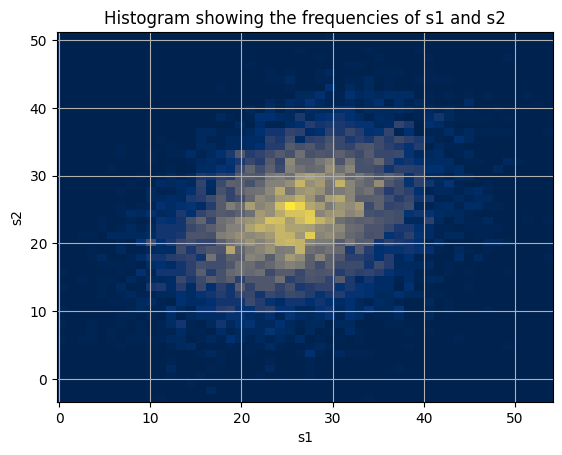

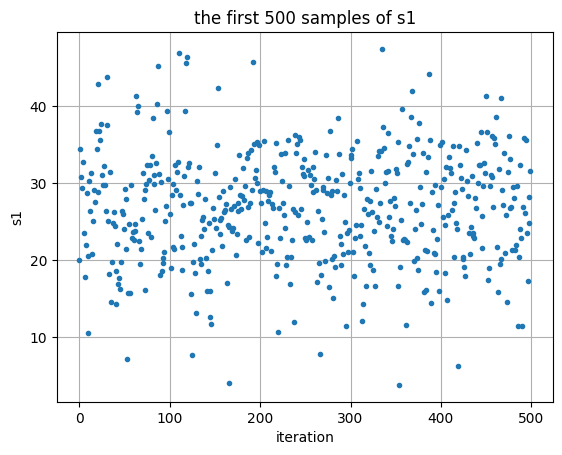

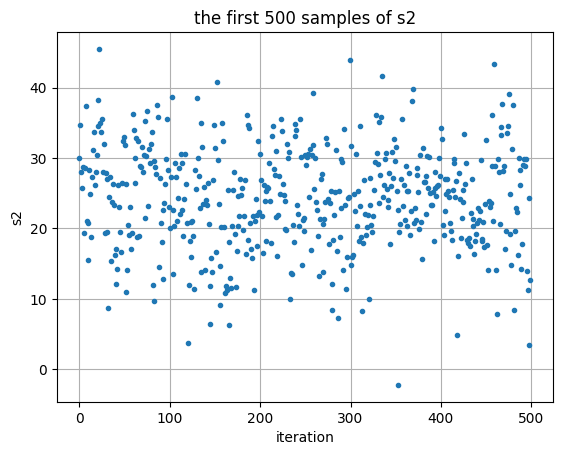

means: s1= 26.238164946407842 , s2= 23.835492677247647
stds: s1= 7.163295644177761 , s2= 7.138614790673798


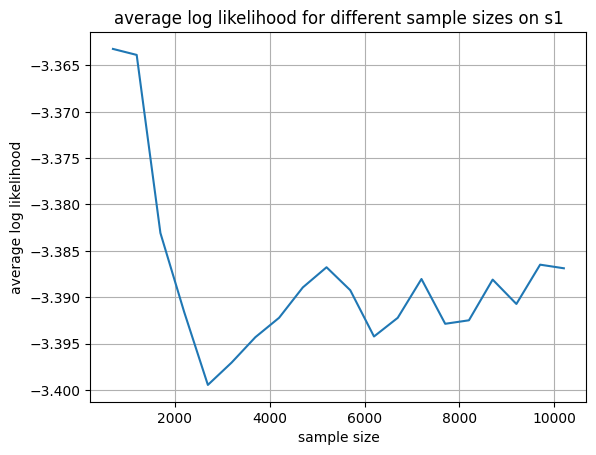

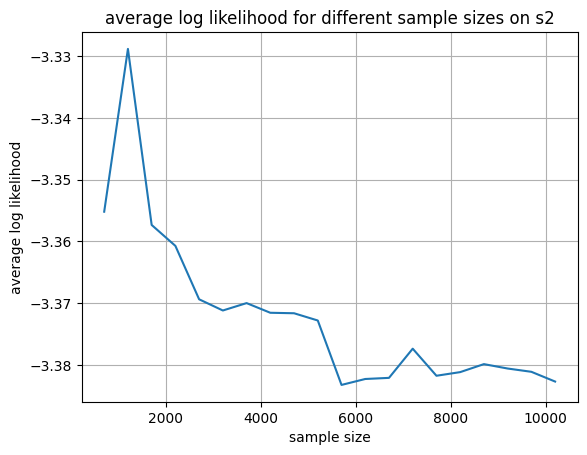

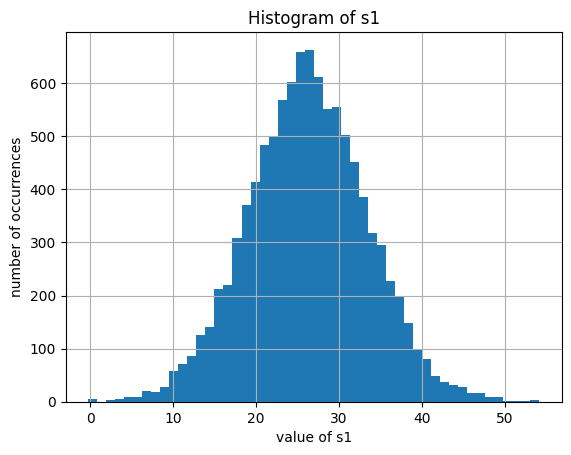

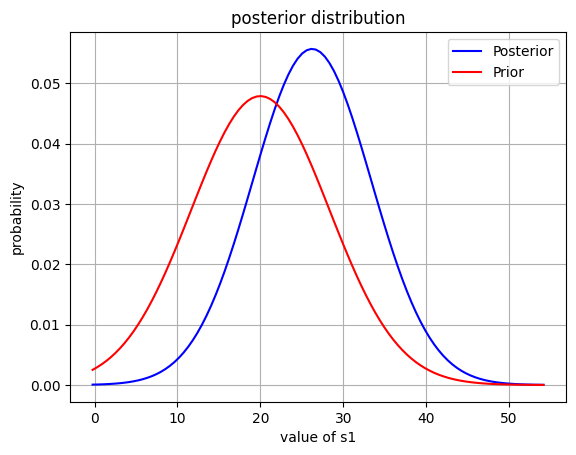

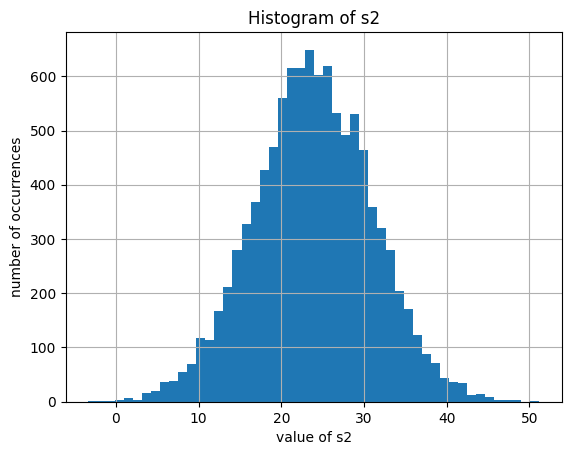

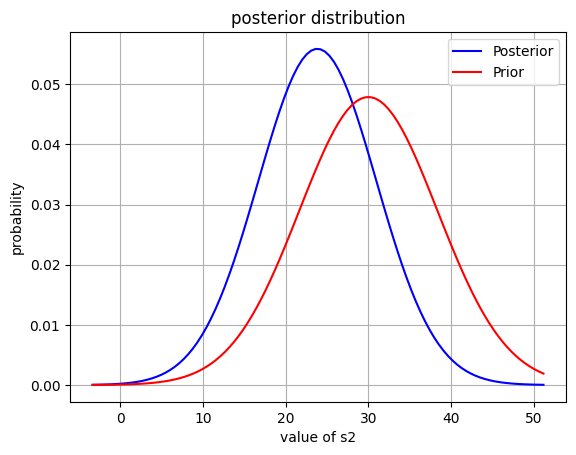

In [1]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import norm

def custom_normal(mean, std, low_bound, high_bound, size=1):
    # the documentation says we need to standardize the bounds, express them in standard deviations
    low_std_bound = (low_bound - mean) / std
    high_std_bound = (high_bound - mean) / std
    if size == 1:
        return truncnorm.rvs(low_std_bound, high_std_bound, loc=mean, scale=std, size=size)[0]
    return truncnorm.rvs(low_std_bound, high_std_bound, loc=mean, scale=std, size=size) # for testing on histogram

def sample_t(s1, s2, y, std_t):
    if y == 1:
        return custom_normal(mean=s1-s2, std=std_t, low_bound=0, high_bound=np.inf)    
    else:
        return custom_normal(mean=s1-s2, std=std_t, low_bound=-np.inf, high_bound=0)

def sample_s1(t, std_1, s2, mu1):
    new_std_1_sq = (1/std_t**2 + 1/std_1**2)**-1
    new_mu_1 = new_std_1_sq * ((t+s2)/std_t**2 + mu1/std_1**2)
    return np.random.normal(new_mu_1, new_std_1_sq**0.5)
        
def sample_s2(t, std_2, s1, mu2):
    new_std_2_sq = (1/std_t**2 + 1/std_2**2)**-1
    new_mu_2 = new_std_2_sq * ((s1-t)/std_t**2 + mu2/std_2**2)
    return np.random.normal(new_mu_2, new_std_2_sq**0.5)

def gibbs_sampler(mu1, std_1, mu2, std_2, std_t, y, nr_samples):
    s1_samples = np.zeros(nr_samples)
    s2_samples = np.zeros(nr_samples)
    
    s1_samples[0] = mu1
    s2_samples[0] = mu2

    for i in range(1, nr_samples):

        s1 = s1_samples[i-1]
        s2 = s2_samples[i-1]

        t = sample_t(s1, s2, y, std_t)

        new_s1 = sample_s1(t, std_1, s2, mu1)
        new_s2 = sample_s2(t, std_2, new_s1, mu2)

        s1_samples[i] = new_s1
        s2_samples[i] = new_s2

    return s1_samples, s2_samples

def avg_gaussian_log_likelihood(values, mu, std):
    probabilities = norm.pdf(values, loc=mu, scale=std)
    log_prob = np.log(probabilities)
    return np.sum(log_prob) / len(values)

def get_avg_ll(values, mu, std, burn_in):
    nr_values = len(values)
    sample_sizes = np.linspace(burn_in, nr_values, 21)[1:] # skips empty list
    sample_sizes = np.round(sample_sizes) # indices has to be integers
    avg_lls = []
    for sample_size in sample_sizes:
        ll = avg_gaussian_log_likelihood(values[burn_in:int(sample_size)], mu, std)
        avg_lls.append(ll)
    return sample_sizes, avg_lls
    

mu1 = 20
mu2 = 30
std_1 = 25/3
std_2 = 25/3
std_t = 25/3

burn_in = 200

s1_samples, s2_samples = gibbs_sampler(mu1, std_1, mu2, std_2, std_t, y=1, nr_samples=10000 + burn_in)

plt.hist2d(s1_samples, s2_samples, bins=50, density=True, cmap='cividis')
plt.xlabel('s1')
plt.ylabel('s2')
plt.title(f'Histogram showing the frequencies of s1 and s2')
plt.grid()
plt.show()

plt.plot(s1_samples[:500], ".")
plt.title(f'the first 500 samples of s1')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('s1')
plt.show()

plt.plot(s2_samples[:500], '.')
plt.title(f'the first 500 samples of s2')
plt.grid()
plt.xlabel('iteration')
plt.ylabel('s2')
plt.show()

s1_mean = np.mean(s1_samples)
s2_mean = np.mean(s2_samples)
s1_std = np.std(s1_samples)
s2_std = np.std(s2_samples)

print("means: s1=", s1_mean, ", s2=", s2_mean)
print("stds: s1=", s1_std, ", s2=", s2_std)

samples_sizes, avg_lls = get_avg_ll(s1_samples, s1_mean, s1_std, burn_in)
plt.plot(samples_sizes, avg_lls)
plt.title(f'average log likelihood for different sample sizes on s1')
plt.grid()
plt.xlabel('sample size')
plt.ylabel('average log likelihood')
plt.show()

samples_sizes, avg_lls = get_avg_ll(s2_samples, s2_mean, s2_std, burn_in)
plt.plot(samples_sizes, avg_lls)
plt.title(f'average log likelihood for different sample sizes on s2')
plt.grid()
plt.xlabel('sample size')
plt.ylabel('average log likelihood')
plt.show()

plt.hist(s1_samples, 50)
plt.title(f'Histogram of s1')
plt.grid()
plt.xlabel('value of s1')
plt.ylabel('number of occurrences')
plt.show()

x = np.linspace(np.min(s1_samples), np.max(s1_samples), 100)
plt.plot(x, norm.pdf(x, loc=s1_mean, scale=s1_std), 'b-', label='Posterior')
plt.plot(x, norm.pdf(x, loc=mu1, scale=std_1), 'r-', label='Prior')
plt.grid()
plt.title("posterior distribution")
plt.xlabel("value of s1")
plt.ylabel("probability")
plt.legend()
plt.show()

plt.hist(s2_samples, 50)
plt.title(f'Histogram of s2')
plt.grid()
plt.xlabel('value of s2')
plt.ylabel('number of occurrences')
plt.show()

x = np.linspace(np.min(s2_samples), np.max(s2_samples), 100)
plt.plot(x, norm.pdf(x, loc=s2_mean, scale=s2_std), 'b-', label='Posterior')
plt.plot(x, norm.pdf(x, loc=mu2, scale=std_2), 'r-', label='Prior')
plt.grid()
plt.title("posterior distribution")
plt.xlabel("value of s2")
plt.ylabel("probability")
plt.legend()
plt.show()



## 1.5 and 1.6 One-Step-Ahead Predictions

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import norm

data_SA = pd.read_csv(
        "SerieA.csv"
    )

def csv_formatter(row):
    team1 = row["team1"]
    team2 = row["team2"]
    score1 = row["score1"]
    score2 = row["score2"]
    y = 0
    if score1 > score2:
        y = 1
    if score2 > score1:
        y = -1
    return pd.Series([team1, team2, y], index=['team1', 'team2', 'y'])

#print(data_SA)

#data_SA = data_SA.sample(frac=1).reset_index(drop=True) # shuffles rows

#print(data_SA)

matches_2018 = data_SA.apply(csv_formatter, axis=1)
matches_2018 = matches_2018[matches_2018['y'] != 0] # filter out matches ended in draw

#print(matches_2018)

all_teams_2018 = pd.concat([matches_2018["team1"], matches_2018["team2"]]).drop_duplicates()
all_teams_2018 = all_teams_2018.reset_index(drop=True)
#print(all_teams_2018)
print("number of teams:", len(all_teams_2018))


number of teams: 20


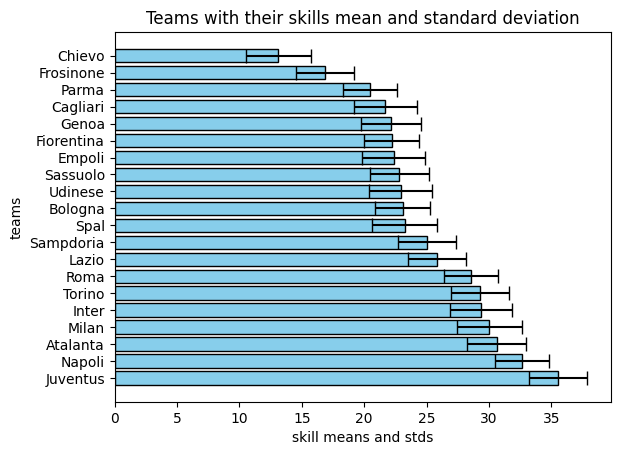

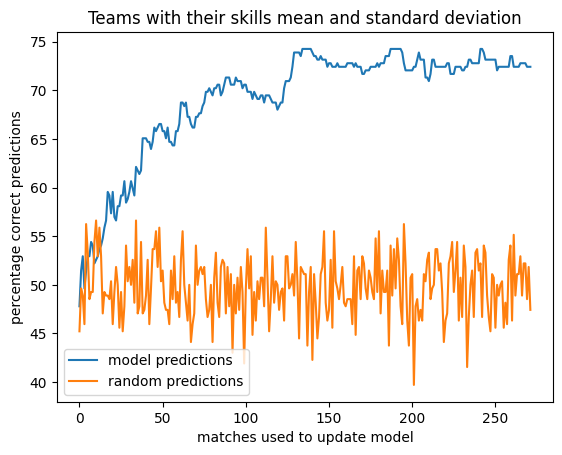

In [106]:

def calc_pred_rate(matches, mu_dict, std_dict, std_t):

    correct_predictions = 0
    correct_random_preds = 0
    nr_matches = 0

    for i, match in matches.iterrows():
        team1 = match["team1"]
        team2 = match["team2"]
        y = match["y"]

        mu1 = mu_dict[team1]
        mu2 = mu_dict[team2]
        std_1 = std_dict[team1]
        std_2 = std_dict[team2]

        p_loss = norm.cdf(0, loc=mu1-mu2, scale=(std_1**2 + std_2**2 + std_t**2)**0.5)
        p_win = 1 - p_loss

        if p_win > p_loss and y == 1:
            correct_predictions += 1
        if p_loss >= p_win and y == -1:
            correct_predictions += 1

        rand_float = random.rand()
        if rand_float > 0.5 and y == 1:
            correct_random_preds += 1
        if rand_float <= 0.5 and y == -1:
            correct_random_preds += 1

        nr_matches += 1

    return correct_predictions / nr_matches, correct_random_preds / nr_matches


def rank_teams(all_teams, matches, mu_dict, std_dict):

    if not bool(mu_dict): # if empty
        for team in all_teams:
            mu_dict[team] = 25
            std_dict[team] = 25/3
    std_t = 25/3

    pred_rates = []
    rand_pred_rates = []


    for i, match in matches.iterrows():
        team1 = match["team1"]
        team2 = match["team2"]
        y = match["y"]

        mu1 = mu_dict[team1]
        mu2 = mu_dict[team2]
        std_1 = std_dict[team1]
        std_2 = std_dict[team2]

        s1_samples, s2_samples = gibbs_sampler(mu1, std_1, mu2, std_2, std_t, y, nr_samples=4000)

        mu_dict[team1] = np.mean(s1_samples)
        mu_dict[team2] = np.mean(s2_samples)
        std_dict[team1] = np.std(s1_samples)
        std_dict[team2] = np.std(s1_samples)

        pred_rate, rand_pred_rate = calc_pred_rate(matches, mu_dict, std_dict, std_t)
        pred_rates.append(pred_rate * 100)
        rand_pred_rates.append(rand_pred_rate * 100)

    table = []
    for i, team in enumerate(all_teams):
        mu = mu_dict[team]
        std = std_dict[team]
        table.append([team, mu, std])
        
    #print(table)

    table = sorted(table, key=lambda x: -x[1]) # sort by mu

    #print(table)

    teams = []
    means = []
    stds = []
    for row in table:
        teams.append(row[0])
        means.append(row[1])
        stds.append(row[2])

    # Create vertical bar plot with error bars
    plt.barh(teams, means, xerr=stds, capsize=5, color='skyblue', edgecolor='black')

    # Formatting
    plt.ylabel('teams')
    plt.xlabel('skill means and stds')
    plt.title('Teams with their skills mean and standard deviation')
    plt.show()

    plt.plot(pred_rates, label="model predictions")
    plt.plot(rand_pred_rates, label="random predictions")
    plt.ylabel('percentage correct predictions')
    plt.xlabel('matches used to update model')
    plt.title('Teams with their skills mean and standard deviation')
    plt.legend()
    plt.show()

    return mu_dict, std_dict
    

_, _ = rank_teams(all_teams_2018, matches_2018, mu_dict={}, std_dict={})



## 1.7 Message Passing Algorithm 

On the Microsoft webpage about TrueSkills linked in the exercise, the following formulas are found:

$\mu_{winner} \leftarrow \mu_{winner} + \frac{\sigma^2_{winner}}{c} \cdot v\left(\frac{\mu_{winner} - \mu_{loser}}{c}, \frac{\varepsilon}{c}\right)$

$\mu_{loser} \leftarrow \mu_{loser} - \frac{\sigma^2_{loser}}{c} \cdot v\left(\frac{\mu_{winner} - \mu_{loser}}{c}, \frac{\varepsilon}{c}\right)$

$\sigma^2_{winner} \leftarrow \sigma^2_{winner} \cdot \left[ 1 - \frac{\sigma^2_{winner}}{c^2} \cdot w\left(\frac{\mu_{winner} - \mu_{loser}}{c}, \frac{\varepsilon}{c}\right) \right]$

$\sigma^2_{loser} \leftarrow \sigma^2_{loser} \cdot \left[ 1 - \frac{\sigma^2_{loser}}{c^2} \cdot w\left(\frac{\mu_{winner} - \mu_{loser}}{c}, \frac{\varepsilon}{c}\right) \right]$

$c^2 = 2\beta^2 + \sigma^2_{winner} + \sigma^2_{loser}$

By setting $\beta=\sigma_t$, these formulas can be used to approximate the posterior distributions

## 1.8 Custom Dataset

The dataset is all matches from the football world cup in 2022. It was downloaded from https://fixturedownload.com/ which provides data about sports competitions. The only preprocessing was to modify the dataloader from exercise 1.5 to convert the dataset into the same format as before with team1 team2 and y as the columns. This makes it possible to reuse the functions from before.

In the real competition, Argenina won over France and this model predicts both of these teams to be in the top 3. Compared to the previous dataset, the world cup has fewer matches and more teams, so the varaince is significantly higher. Also, the further a team progresses in the competition, the more matches they get to play. This could partly explain why the best teams have less varaince than the worst teams. But this could also be due to the better teams being more consistant.  

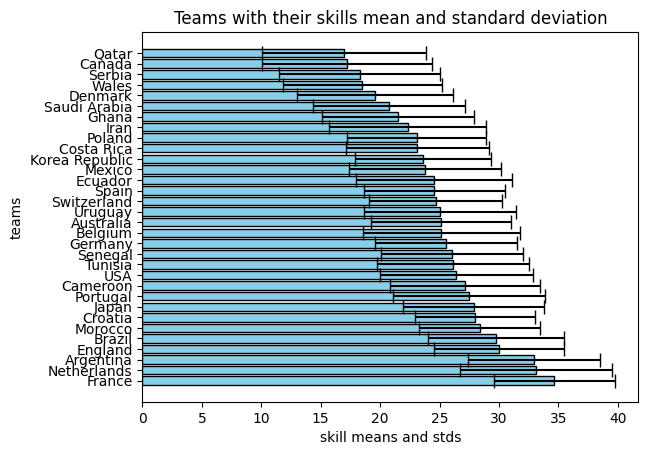

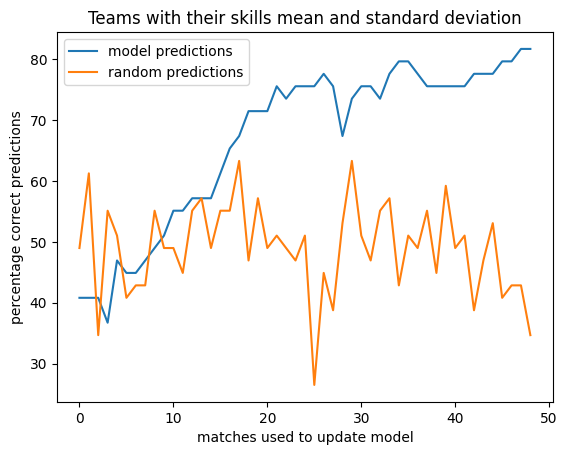

In [84]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import norm

data_fifa = pd.read_csv(
        "fifa-world-cup-2022.csv"
    )

def csv_formatter(row):
    team1 = row["Home Team"]
    team2 = row["Away Team"]
    result = row["Result"]

    scores = result.split("-")
    score1 = int(scores[0])
    score2 = int(scores[1])

    y = 0
    if score1 > score2:
        y = 1
    if score2 > score1:
        y = -1
    return pd.Series([team1, team2, y], index=['team1', 'team2', 'y'])

#print(data_fifa)

matches_wc = data_fifa.apply(csv_formatter, axis=1)
matches_wc = matches_wc[matches_wc['y'] != 0] # filter out matches ended in draw

#print(matches_wc)

all_teams_wc = pd.concat([matches_wc["team1"], matches_wc["team2"]]).drop_duplicates()
all_teams_wc = all_teams_wc.reset_index(drop=True)
#print(all_teams_wc)

mu_dict, std_dict = rank_teams(all_teams_wc, matches_wc)


## 1.9 Model Extensions 

In [88]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import norm

data_SA_2017 = pd.read_csv(
        "serie-a-2017.csv"
    )

def csv_formatter(row):
    team1 = row["Home Team"]
    team2 = row["Away Team"]
    result = row["Result"]

    if team1 == "Inter Milan":
        team1= "Inter"
    if team2 == "Inter Milan":
        team2= "Inter"
    if team1 == "AC Milan":
        team1= "Milan"
    if team2 == "AC Milan":
        team2= "Milan"

    scores = result.split("-")
    score1 = int(scores[0])
    score2 = int(scores[1])

    y = 0
    if score1 > score2:
        y = 1
    if score2 > score1:
        y = -1
    return pd.Series([team1, team2, y], index=['team1', 'team2', 'y'])

# print(data_SA_2017)

matches_2017 = data_SA_2017.apply(csv_formatter, axis=1)
matches_2017 = matches_2017[matches_2017['y'] != 0] # filter out matches ended in draw

# print(matches_2017)

all_teams_2017 = pd.concat([matches_2017["team1"], matches_2017["team2"]]).drop_duplicates()
all_teams_2017 = all_teams_2017.reset_index(drop=True)
# print(all_teams_2017)



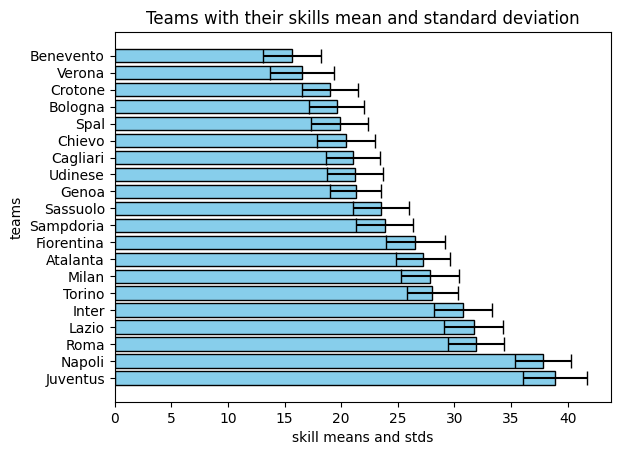

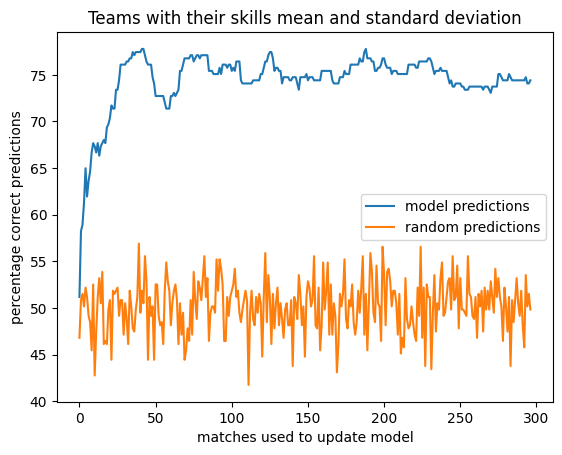

Empoli did not play in serie A the prior year
Parma did not play in serie A the prior year
Frosinone did not play in serie A the prior year


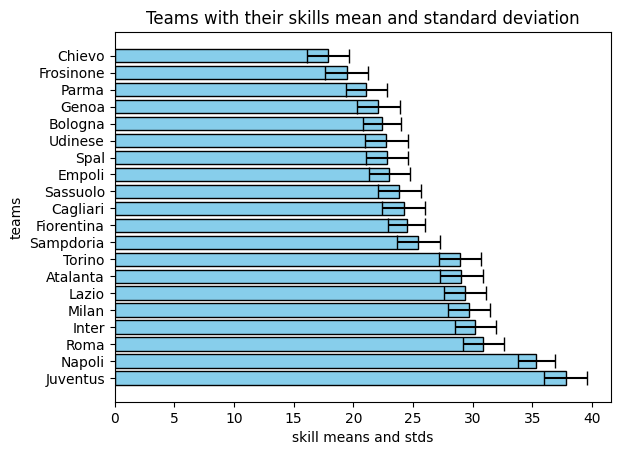

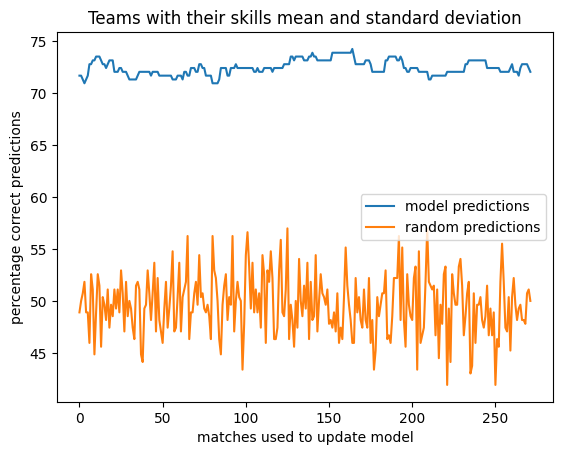

In [107]:
mu_dict_2017, std_dict_2017 = rank_teams(all_teams_2017, matches_2017, mu_dict={}, std_dict={})

teams_2017 = list(all_teams_2017)
teams_2018 = list(all_teams_2018)

for team in teams_2018:
    if team not in teams_2017:
        mu_dict_2017[team] = 25
        std_dict_2017[team] = 25/3
        print(team, "did not play in serie A the prior year")

mu_dict_2018, std_dict_2018 = rank_teams(all_teams_2018, matches_2018, mu_dict=mu_dict_2017, std_dict=std_dict_2017)



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c0d3fbd-b6ee-49fa-994a-0a7a4a6dd817' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>